# **Atividade Computacional 03 - TEEC III**
## **Aluno: André Paiva Conrado Rodrigues**

## Importando bibliotecas

Nesta seção do código, são importadas bibliotecas de manipulação de dados importantes para a obtenção das amostras dos arquivos de áudio, bem como para a manipulação das mesmas.

In [1]:
import numpy as np
import math
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.pyplot as plt

## Função para plotagem de gráficos de sinais ao longo do tempo

Abaixo é definida uma função para plotar o gráficos de um sinal no domínio do tempo.

In [2]:
def plotar(dataArray, title):
    plt.figure(figsize=(17,5))
    plt.margins(0, 0)    
    plt.xlabel('Amostras')
    plt.title(title)
    plt.plot(dataArray)
    plt.show()

## Função para plotagem de espectrogramas dos sinais

Abaixo é definida uma função para plotar o espectrograma de um sinal.

In [3]:
def spectroPlot(audioArray, rate, windowSize, title):
    f, t, Sxx = signal.spectrogram(audioArray, rate, nperseg=windowSize)
    plt.figure(figsize=(17,5))
    plt.pcolormesh(t, f, np.abs(Sxx), shading='auto', cmap='bone', vmin=0, vmax=2047)
    plt.title(title)
    plt.ylabel('Frequência [Hz]')
    plt.xlabel('Tempo [s]')
    plt.colorbar()
    plt.show()

## Definição de função para resample (up e down) de fator 2

No próximo bloco de código é definida a função `resampleBy2` capaz de fazer upsampling e downsampling em um arquivo de áudio `.wav` (passado para a função pelo parâmetro `filename`). Tal resampling tem fator fixo 2, tanto para upsampling quanto para downsampling.

Como plotamos o espectrograma para análise do espectro pré e pós-resampling, também passamos para a função (pelo parâmetro `windowSize`) a largura de amostras da janela utilizada para FFT e plotagem.

O terceiro e último parâmetro da função é o tipo de resample a ser aplicado no sinal ("up" ou "down").

Caso seja escolhido o downsampling:
*    Coletamos amostras alternadas do sinal de áudio (amostra sim, amostra não).

Caso seja escolhido o upsampling:
*    Coletamos todas as amostras do áudio do início ao fim, e a cada amostra coletada, é inserida uma amostra de amplitude zero imediatamente depois;
*    Aplicamos um filtro passa-baixa butterworth de 2ª ordem com frequência de corte igual à metade da taxa de amostragem do sinal original.

Para ambas as escolhas, são mostrados como resultados:
*    Players de áudio com o sinal original e sinal resampleado;
*    Gráficos da forma de onda do sinal original e sinal resampleado;
*    Espectrogramas do sinal original e sinal resampleado.

In [4]:
def resampleBy2(filename, windowSize, resampleType):
    samplerate, data = wavfile.read(filename)
    qtdSamples = data.shape[0]
    resampleList = []
    if resampleType == "up":
        resampleRate = int(samplerate*2)
    elif resampleType == "down":
        resampleRate = int(samplerate/2)
    i = 0
    while(i < qtdSamples):
        resampleList.append(data[i])
        if resampleType == "up":
            resampleList.append(0)
            i = i + 1
        elif resampleType == "down":
            i = i + 2
    resampleArray = np.array(resampleList)
    del resampleList
    if resampleType == "up":
        sos = signal.butter(2, samplerate/2, 'lp', fs=resampleRate, output='sos')
        resampleArray = signal.sosfilt(sos, resampleArray)
    title = " - Áudio " + resampleType + "sampled"
    print("Player - Áudio original")
    display(Audio(filename, rate=samplerate))
    print("Player" + title)
    display(Audio(resampleArray, rate=resampleRate))
    spectroPlot(data, samplerate, windowSize, "Espectrograma - Áudio original")
    spectroPlot(resampleArray, resampleRate, windowSize, "Espectrograma" + title)
    plotar(data, "Waveform - Áudio original")
    plotar(resampleArray, "Waveform" + title)

## Análise - Sinal de alta frequência (downsampling)

O primeiro sinal escolhido para análise foi um sinal de áudio com conteúdo espectral nas frequências agudas (> 10 kHz).

Ao aplicar o processo de downsampling, notamos que o tom do sinal de áudio muda bastante em relação ao sinal original. Isso pode ser facilmente explicado observando os espectrogramas do sinal pré e pós-downsampĺing: a "massa mais significativa" do espectro de frequência do sinal original foi deslocada para uma banda de frequência menor.

Como a frequência de amostragem foi reduzida pela metade, a capacidade de coleta de amostras suficientes para representar as altas frequências do sinal original foi perdida. Porém, pelas amostras do sinal downsampleado ainda é observada a tendência de oscilação, ainda que em uma frequência menor. Logo, a oscilação do sinal de áudio nas altas frequências será deslocada para uma frequência menor.

Player - Áudio original


Player - Áudio downsampled


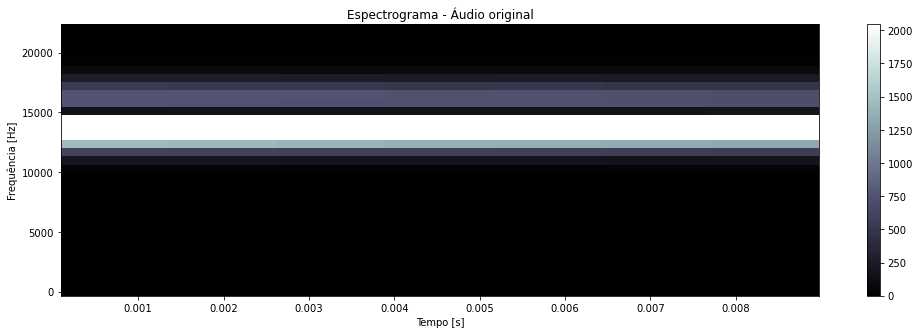

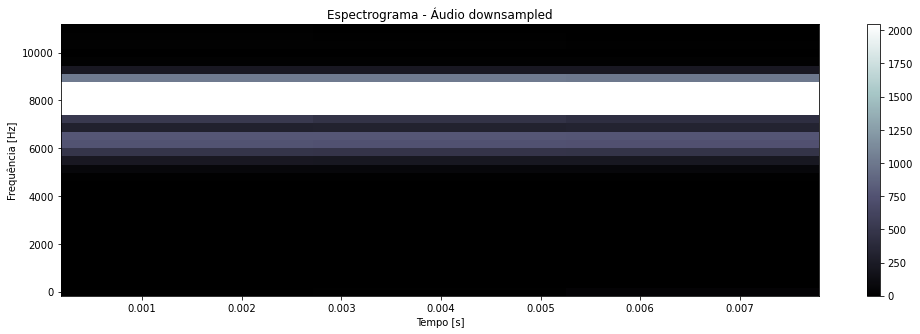

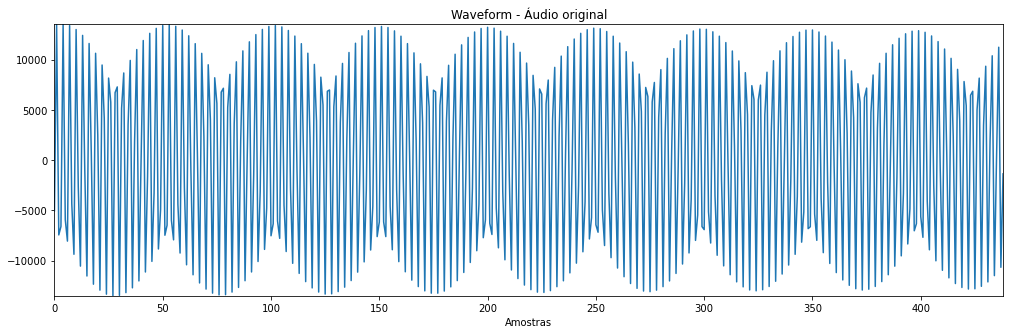

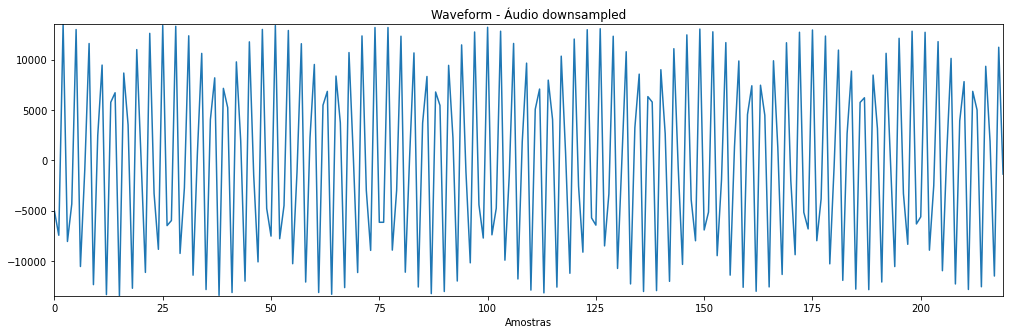

In [5]:
resampleBy2('highfreq.wav', 64, 'down')

## Análise - Sinal de alta frequência (upsampling)

Foi utilizado o mesmo sinal de alta frequência anterior.

Ao aplicar o processo de upsampling não foi notada distorção claramente perceptível no sinal de áudio; no entanto, é possível visualizar algumas pequenas distorções ao visualizar o gráfico do sinal no domínio do tempo.

O processo de filtragem no upsampling é feito para que as amostras de amplitude zero inseridas ao longo do sinal assumam alguma amplitude mais condizente com a tendência de variação das amostras do sinal original. Porém, é perceptível que mesmo com a filtragem passa-baixa sobraram alguns resquícios de conteúdo (até então inexistentes no sinal original) na faixa de frequência não audível. Provavelmente esse conteúdo espectral percebido se deve à ordem do filtro aplicado (2ª ordem); talvez a aplicação de um filtro de ordem suficientemente grande mitigasse por completo os espúrios gerados na frequência não audível.

Player - Áudio original


Player - Áudio upsampled


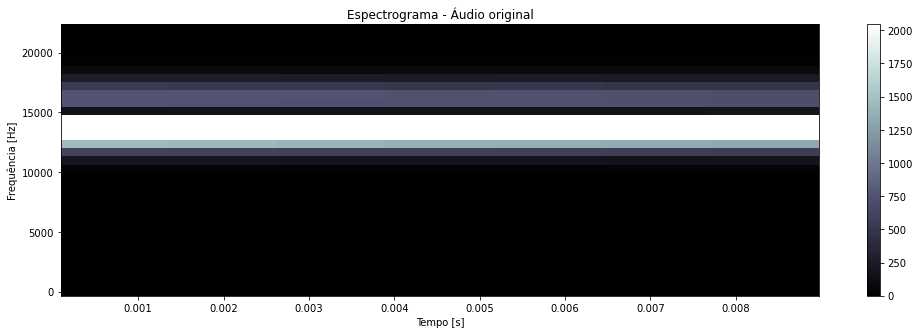

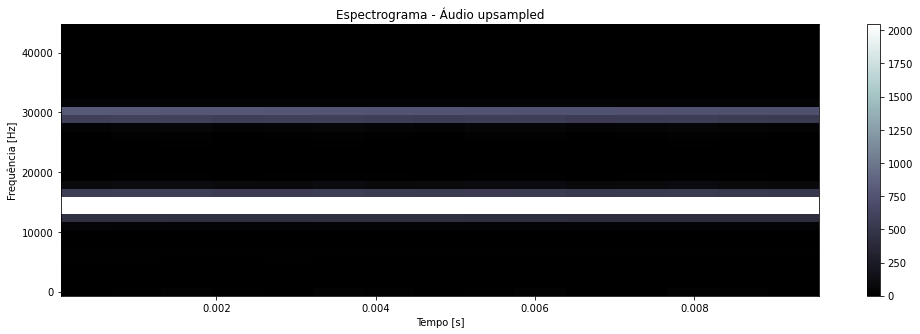

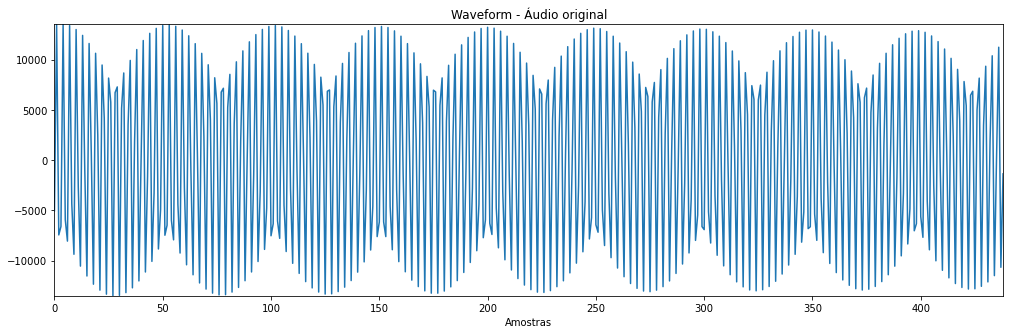

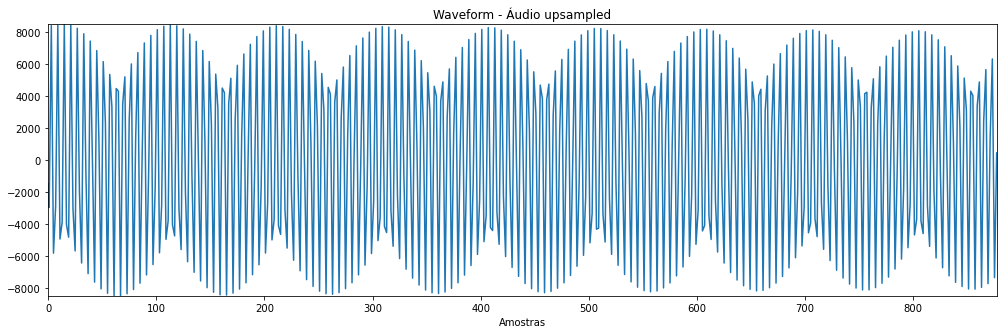

In [6]:
resampleBy2('highfreq.wav', 64, 'up')

## Análise - Sinal de violão (downsampling)

O sinal de violão captado possui predominância de conteúdo espectral nas frequências baixas.

Portanto, no processo de downsampling, não conseguimos perceber tão facilmente a diferença ao ouvir os dois sinais. Para ouvidos mais treinados, é perceptível que o áudio perde um pouco de seu "brilho" (as frequências mais altas são perdidas).

Player - Áudio original


Player - Áudio downsampled


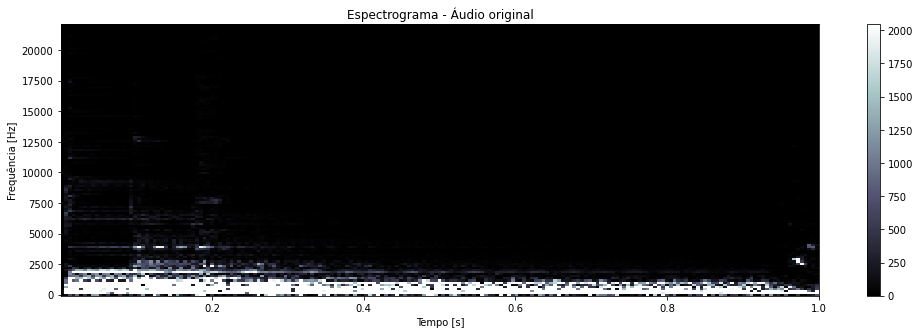

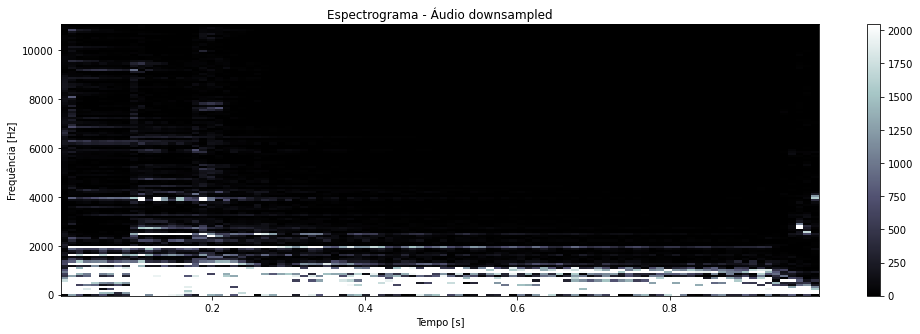

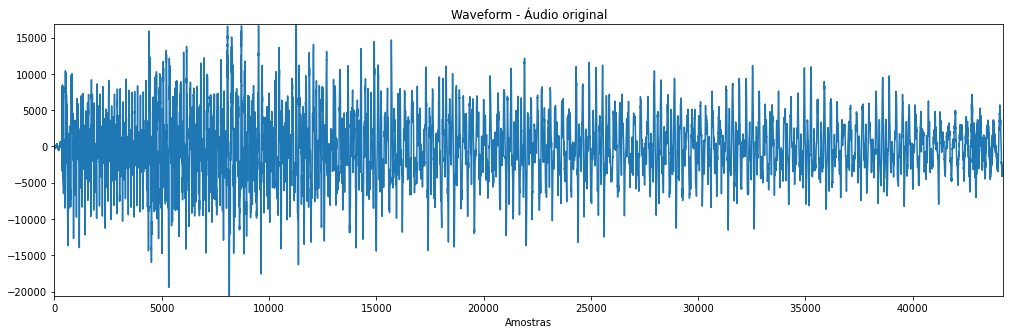

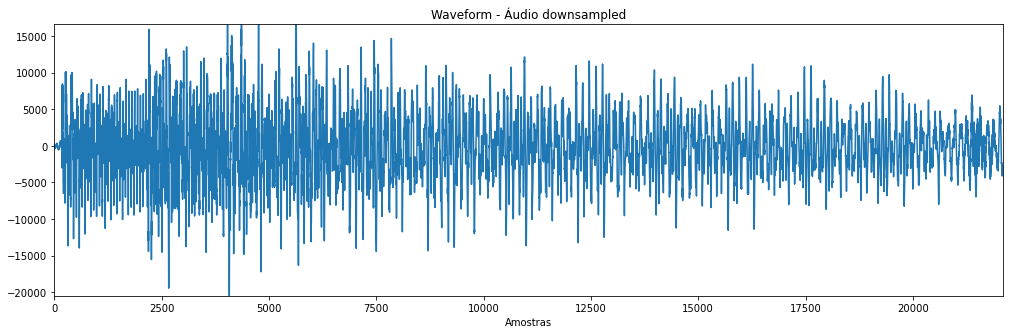

In [7]:
resampleBy2('guitar.wav', 256, 'down')

## Análise - Sinal de violão (upsampling)

Com o processo de upsampling, não foi observada variação notável no espectro de frequência do sinal, e não é notada nenhuma diferença sio

Player - Áudio original


Player - Áudio upsampled


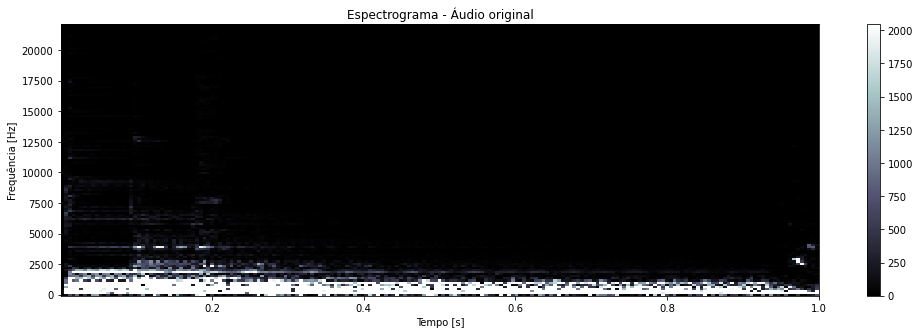

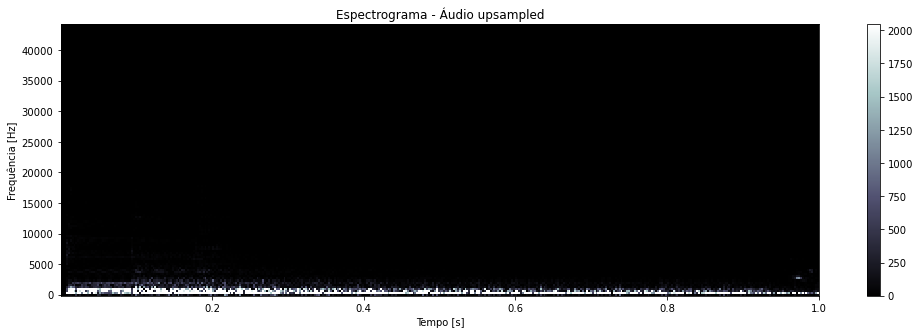

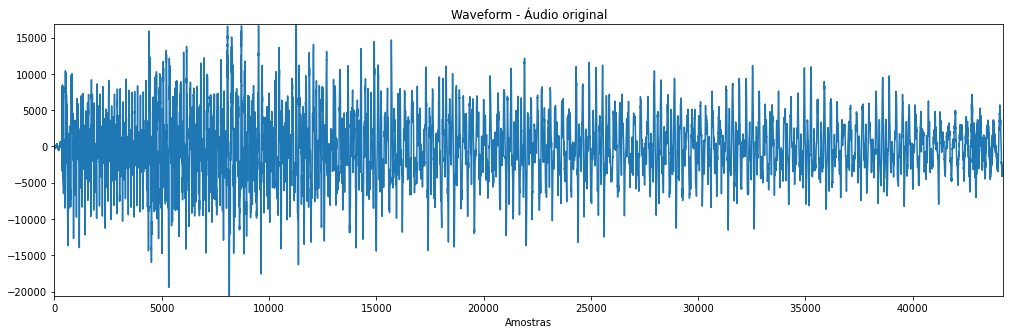

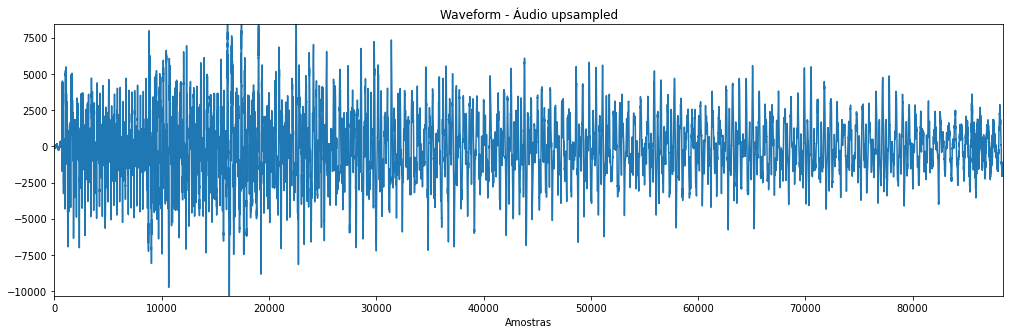

In [8]:
resampleBy2('guitar.wav', 256, 'up')